In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from sklearn.preprocessing import MinMaxScaler

In [40]:
# Load settings from config.yaml
with open("config.yaml", 'r') as file:
    config = yaml.safe_load(file)

In [41]:
merged_historical_data_path = config['prepare_historical_data']['data']['merged_historical_data_path']
merged_future_data_path = config['prepare_future_data']['data']['merged_future_data_path']

In [42]:
hist_data = pd.read_csv(merged_historical_data_path, parse_dates=['Date'])
future_data = pd.read_csv(merged_future_data_path, parse_dates=['Date'])

In [43]:
hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                363 non-null    datetime64[ns]
 1   OP_Price            363 non-null    float64       
 2   AVPI                363 non-null    float64       
 3   PR                  363 non-null    float64       
 4   LAR                 363 non-null    float64       
 5   Votable Supply      363 non-null    float64       
 6   Circulating Supply  363 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.0 KB


In [44]:
future_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                761 non-null    datetime64[ns]
 1   OP_Price            761 non-null    float64       
 2   AVPI                761 non-null    float64       
 3   PR                  761 non-null    float64       
 4   LAR                 761 non-null    float64       
 5   Votable Supply      761 non-null    float64       
 6   Circulating Supply  761 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 41.7 KB


In [45]:
data = pd.concat([hist_data, future_data])

In [46]:
data.head()

,Date,OP_Price,AVPI,PR,LAR,Votable Supply,Circulating Supply
0,2023-12-04,1.719741,0.976378,0.090822,0.054445,82765569.72,911294948.0
1,2023-12-05,1.790326,0.445840,0.090529,0.184733,82498452.48,911294948.0
2,2023-12-06,1.800778,0.466266,0.091018,0.112463,82944352.75,911294948.0
3,2023-12-07,1.712827,0.468346,0.090122,0.114737,82127363.78,911294948.0
4,2023-12-08,2.178050,0.381139,0.090156,0.249292,82158482.04,911294948.0


In [47]:
data.tail()

,Date,OP_Price,AVPI,PR,LAR,Votable Supply,Circulating Supply
756,2026-12-27,3.456457,0.362909,0.064435,0.363381,1.742794e+08,2.704720e+09
757,2026-12-28,3.610958,0.379356,0.064581,0.373215,1.746744e+08,2.704720e+09
758,2026-12-29,3.672558,0.389099,0.064724,0.349361,1.750611e+08,2.704720e+09
759,2026-12-30,3.550599,0.385669,0.064864,0.319766,1.754388e+08,2.704720e+09
760,2026-12-31,3.646237,0.391991,0.065000,0.281426,1.758068e+08,2.704720e+09


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1124 entries, 0 to 760
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1124 non-null   datetime64[ns]
 1   OP_Price            1124 non-null   float64       
 2   AVPI                1124 non-null   float64       
 3   PR                  1124 non-null   float64       
 4   LAR                 1124 non-null   float64       
 5   Votable Supply      1124 non-null   float64       
 6   Circulating Supply  1124 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 70.2 KB


### Scale Parameters Using MinMaxScaler

#### OP_Price

In [49]:
print('Min OP Price -', round(data['OP_Price'].min(), 2))
print('Max OP Price -', round(data['OP_Price'].max(), 2))

Min OP Price - 1.17
Max OP Price - 5.2


In [50]:
# MinMax scaling of OP_Price
scaler = MinMaxScaler()
data['OP_Price_Scaled'] = scaler.fit_transform(data[['OP_Price']])

In [51]:
print('Min Scaled OP Price -', round(data['OP_Price_Scaled'].min(), 2))
print('Max Scaled OP Price -',round(data['OP_Price_Scaled'].max(), 2))

Min Scaled OP Price - 0.0
Max Scaled OP Price - 1.0


#### AVPI

In [52]:
print('Min AVPI -', round(data['AVPI'].min(), 2))
print('Max AVPI -', round(data['AVPI'].max(), 2))

Min AVPI - 0.18
Max AVPI - 0.98


In [53]:
# MinMax scaling of AVPI
scaler = MinMaxScaler()
data['AVPI_Scaled'] = scaler.fit_transform(data[['AVPI']])

In [54]:
print('Min Scaled AVPI -', round(data['AVPI_Scaled'].min(), 2))
print('Max Scaled AVPI -', round(data['AVPI_Scaled'].max(), 2))

Min Scaled AVPI - 0.0
Max Scaled AVPI - 1.0


#### PR

In [55]:
print('Min PR -', round(data['PR'].min(), 2))
print('Max PR -', round(data['PR'].max(), 2))

Min PR - 0.06
Max PR - 0.09


In [56]:
# MinMax scaling of PR
scaler = MinMaxScaler()
data['PR_Scaled'] = scaler.fit_transform(data[['PR']])

In [57]:
print('Min Scaled PR -', round(data['PR_Scaled'].min(), 2))
print('Max Scaled PR -', round(data['PR_Scaled'].max(), 2))

Min Scaled PR - 0.0
Max Scaled PR - 1.0


#### LAR

In [58]:
print('Min LAR -', round(data['LAR'].min(), 2))
print('Max LAR -', round(data['LAR'].max(), 2))

Min LAR - 0.03
Max LAR - 0.52


In [59]:
# MinMax scaling of LAR
scaler = MinMaxScaler()
data['LAR_Scaled'] = scaler.fit_transform(data[['LAR']])

In [60]:
print('Min Scaled LAR -', round(data['LAR_Scaled'].min(), 2))
print('Max Scaled LAR -', round(data['LAR_Scaled'].max(), 2))

Min Scaled LAR - 0.0
Max Scaled LAR - 1.0


In [61]:
data.columns

Index(['Date', 'OP_Price', 'AVPI', 'PR', 'LAR', 'Votable Supply',
       'Circulating Supply', 'OP_Price_Scaled', 'AVPI_Scaled', 'PR_Scaled',
       'LAR_Scaled'],
      dtype='object')

In [62]:
all_parameters_merged_data_path = config['merge_and_scale_data']['data']['all_parameters_merged_data_path']

In [63]:
data.to_csv(all_parameters_merged_data_path, index=False)

### Find Correlation

In [64]:
# Function to calculate correlation and normalize it
def calculate_normalized_correlations(data, target_column):
    """
    Calculate normalized absolute correlations of all columns with the target column.
    """
    correlation_matrix = data.corr()
    absolute_correlations = correlation_matrix[target_column].abs().drop(target_column)
    normalized_correlations = absolute_correlations / absolute_correlations.sum()
    normalized_correlations = normalized_correlations.round(2).sort_values(ascending=False)
    print("Normalized Correlations:")
    print(normalized_correlations)
    return normalized_correlations


In [65]:
# Function to calculate weightage ranges based on normalized weights
def calculate_weightage_ranges(weights, k=1):
    """
    Calculate weightage ranges for each parameter based on its weight.
    """
    weight_values = np.array(list(weights.values()))
    std_dev_weight = np.std(weight_values)

    ranges = {
        param: (max(weight - k * std_dev_weight, 0), weight + k * std_dev_weight) 
        for param, weight in weights.items()
    }

    print("\nWeightage Ranges for Each Parameter:")
    for param, (low, high) in ranges.items():
        print(f"{param}: [{low:.2f}, {high:.2f}]")

    return ranges



Correlation Matrix:
                 OP_Price_Scaled  AVPI_Scaled  PR_Scaled  LAR_Scaled  \
OP_Price_Scaled         1.000000     0.357483  -0.422080    0.489695   
AVPI_Scaled             0.357483     1.000000   0.204609   -0.214927   
PR_Scaled              -0.422080     0.204609   1.000000   -0.618809   
LAR_Scaled              0.489695    -0.214927  -0.618809    1.000000   
Votable Supply          0.647781    -0.026241  -0.824467    0.722008   

                 Votable Supply  
OP_Price_Scaled        0.647781  
AVPI_Scaled           -0.026241  
PR_Scaled             -0.824467  
LAR_Scaled             0.722008  
Votable Supply         1.000000  


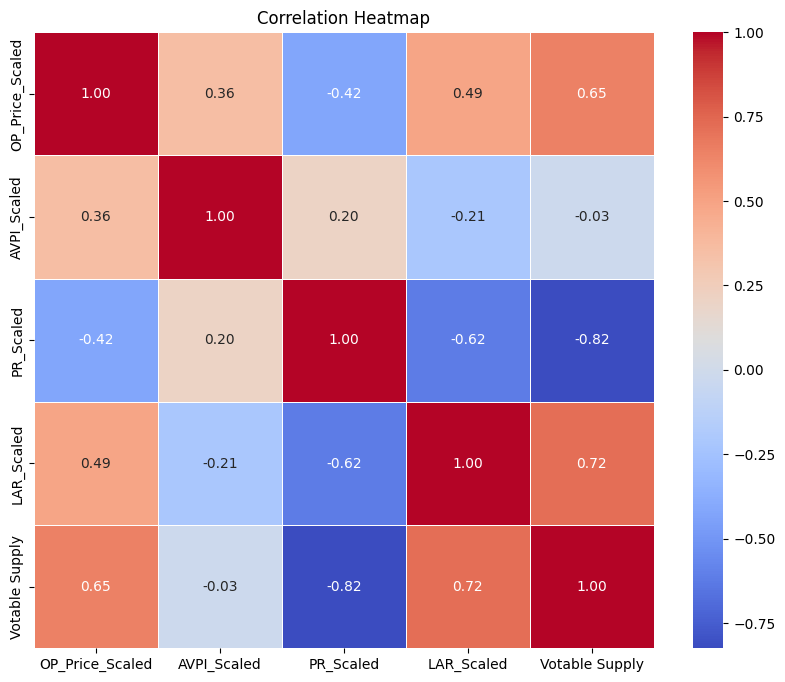

Normalized Correlations:
PR_Scaled          0.37
LAR_Scaled         0.33
OP_Price_Scaled    0.29
AVPI_Scaled        0.01
Name: Votable Supply, dtype: float64

Weightage Ranges for Each Parameter:
PR_Scaled: [0.23, 0.51]
LAR_Scaled: [0.19, 0.47]
OP_Price_Scaled: [0.15, 0.43]
AVPI_Scaled: [0.00, 0.15]


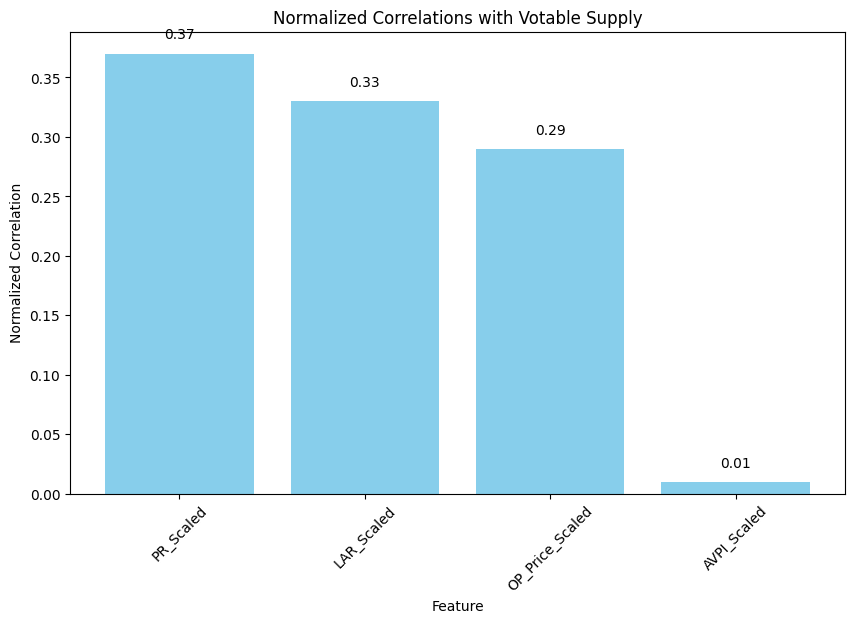

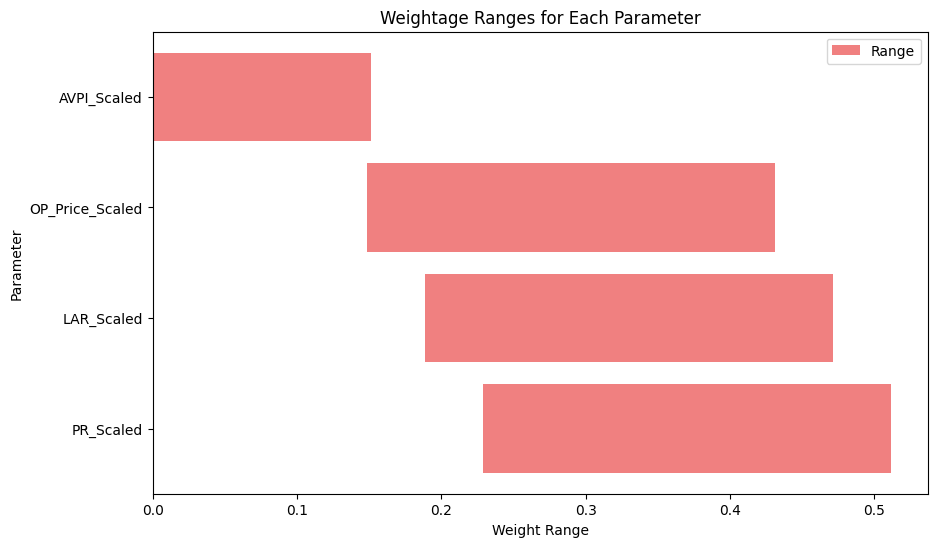

In [66]:
if __name__ == "__main__":

    data = pd.read_csv(all_parameters_merged_data_path)
    data = data[['OP_Price_Scaled', 'AVPI_Scaled', 'PR_Scaled', 'LAR_Scaled', 'Votable Supply']]

    # Step 1: Calculate and display the correlation matrix
    correlation_matrix = data.corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    # Step 2: Plot the heatmap of the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

    # Step 3: Calculate normalized correlations
    target_column = 'Votable Supply'
    normalized_correlations = calculate_normalized_correlations(data, target_column)

    # Step 4: Use normalized correlations as weights to calculate ranges
    weights = normalized_correlations.to_dict()
    weightage_ranges = calculate_weightage_ranges(weights)

    # Step 5: Plot Normalized Correlations
    plt.figure(figsize=(10, 6))
    bars = plt.bar(normalized_correlations.index, normalized_correlations.values, color='skyblue')

    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width() / 2,  
            bar.get_height() + 0.01,           
            f'{bar.get_height():.2f}',        
            ha='center', va='bottom', fontsize=10, color='black' 
        )

    plt.title('Normalized Correlations with Votable Supply')
    plt.xlabel('Feature')
    plt.ylabel('Normalized Correlation')
    plt.xticks(rotation=45)
    plt.show()

    # Step 6: Plot Weightage Ranges
    weightage_low = [low for low, _ in weightage_ranges.values()]
    weightage_high = [high for _, high in weightage_ranges.values()]
    params = list(weightage_ranges.keys())

    plt.figure(figsize=(10, 6))
    plt.barh(params, weightage_high, color='lightcoral', label='Range')
    plt.barh(params, weightage_low, color='white')
    plt.title('Weightage Ranges for Each Parameter')
    plt.xlabel('Weight Range')
    plt.ylabel('Parameter')
    plt.legend()
    plt.show()